# A8
Alice Gee, ag67642 </br>
Andrew Yang, ay6764 </br>
Mohammad Aga, mba929

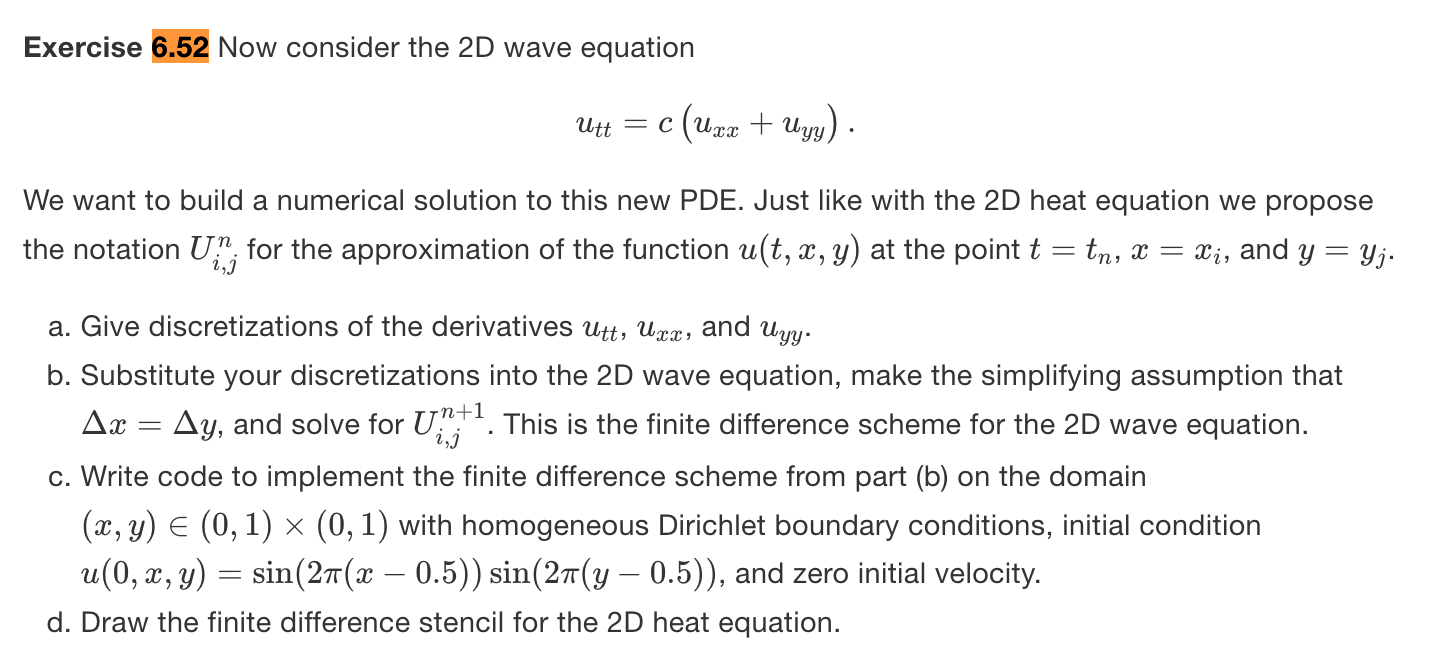

## a 
$u_{tt}$ = $\frac{u(t + ∆t) - 2u(t) + u(t- ∆t)}{∆t^2}$  </br>
$u_{xx}$ = $\frac{u(x + ∆x) - 2u(x) + u(x- ∆x)}{∆x^2}$ </br>
$u_{yy}$ = $\frac{u(y + ∆y) - 2u(y) + u(y- ∆y)}{∆y^2}$ </br>

## b
$\frac{u(t + ∆t) - 2u(t) + u(t- ∆t)}{∆t^2}$ = c ($\frac{u(x + ∆x) - 2u(x) + u(x- ∆x)}{∆x^2}$ + $\frac{u(y + ∆y) - 2u(y) + u(y- ∆y)}{∆y^2}$) </br>
$\frac{u(t + ∆t) - 2u(t) + u(t- ∆t)}{∆t^2}$ = c ($\frac{u(x + ∆x) - 2u(x) + u(x- ∆x) + u(y + ∆y) - 2u(y) + u(y- ∆y)}{∆x^2}$ , since ∆x = ∆y </br>
$\frac{u_{i,j}^{n+1} - 2u_{i,j}^{n} + u_{i,j}^{n-1}}{∆t^2}$ = c($\frac{u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n} + u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n}}{∆x^2})$ </br>
$\frac{u_{i,j}^{n+1} - 2u_{i,j}^{n} + u_{i,j}^{n-1}}{∆t^2}$ = c($\frac{u_{i+1,j}^{n} - 4u_{i,j}^{n} + u_{i-1,j}^{n} + u_{i,j+1}^{n} + u_{i,j-1}^{n}}{∆x^2})$ </br>
$u_{i,j}^{n+1}$ =  $\frac{c∆t^2}{∆x^2}$ $(u_{i+1,j}^{n} - 4u_{i,j}^{n} + u_{i-1,j}^{n} + u_{i,j+1}^{n} + u_{i,j-1}^{n}) + 2u_{i,j}^{n} - u_{i,j}^{n-1}$ </br>

## c

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # this allows for color maps 
from ipywidgets import interactive

def wrapper (x, y, u, t, X, Y):
    def plotter(Frame):
        fig = plt.figure(figsize=(12,10))
        ax = fig.gca(projection='3d')
        ax.plot_surface(X,Y,u[Frame,:,:], cmap=cm.coolwarm)
        ax.set_zlim(0,1)
        plt.show()
    interactive_plot = interactive(plotter, Frame=(0,len(t)))
    display (interactive_plot)

def main():
    # create an array for t starting at t = 0 and ending at t = 1
    # divide this interval into 10 equal parts
    t = np.linspace(0,1,10)
    dt = 0.1

    # create an array for x and y starting at x = 0 and ending at x = 1
    # divide this interval into 10 equal parts
    x = np.linspace(0,1,10)
    y = x
    dx = 0.1
    
    X, Y = np.meshgrid(x,y)
    
    # define the constant 
    c = 0.5

    # define parameter a as
    a = c * (dt / dx) ** 2

    # print the values
    print ("dt = ", dt, ", dx = ", dx, ", a = ", a,)

    # build array U to store all approximations at all times and 
    # at all spatial points
    u = np.zeros ((len(t), len(x), len(y)))

    # enforce the left boundary condition
    u[:,:, 0] = 0 # y initial 
    u[:,0, :] = 0 # x initial 

    # enforce the right boundary condition
    u[:, :, -1] = 0 # y initial 
    u[:, -1, :] = 0 # x initial 

    # enforce the initial condition
    u[0,:, :] = np.sin(2*np.pi*(x - 0.5))*np.sin(2*np.pi*(y - 0.5))
    u[1, :, :] = u[0,:, :]

    # fill the array U one row at a time, leave the boundary conditions
    # fixed and fill indices 1 through -2
    for n in range (1, len(t) - 1):
        u[n + 1, 1:-1, 1:-1] = a*(u[n, 2:,1:-1] - 4*u[n, 1:-1, 1:-1] + u[n, :-2, 1:-1] + u[n, 1:-1, 2:] + \
                                  u[n, 1:-1, :-2]) + 2*u[n, 1:-1, 1:-1] - u[n-1, 1:-1, 1:-1]
    
    # plot the solution
    wrapper (x, y, u, t, X, Y)

main()

dt =  0.1 , dx =  0.1 , a =  0.5


interactive(children=(IntSlider(value=5, description='Frame', max=10), Output()), _dom_classes=('widget-intera…

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # this allows for color maps 
from ipywidgets import interactive

def wrapper (x, y, u, t, X, Y):
    def plotter(Frame):
        fig = plt.figure(figsize=(12,10))
        ax = fig.gca(projection='3d')
        ax.plot_surface(X,Y,u[Frame,:,:], cmap=cm.coolwarm)
        ax.set_zlim(0,1)
        plt.show()
    interactive_plot = interactive(plotter, Frame=(0,len(t)))
    display (interactive_plot)

def main():
    # create an array for t starting at t = 0 and ending at t = 1
    # divide this interval into 10 equal parts
    t = np.linspace(0,1,10)
    dt = 0.1

    # create an array for x and y starting at x = 0 and ending at x = 1
    # divide this interval into 10 equal parts
    x = np.linspace(0,1,10)
    y = x
    dx = 0.1
    
    X, Y = np.meshgrid(x,y)
    
    # define the constant 
    c = 0.5

    # define parameter a as
    a = c * (dt / dx) ** 2

    # print the values
    print ("dt = ", dt, ", dx = ", dx, ", a = ", a,)

    # build array U to store all approximations at all times and 
    # at all spatial points
    u = np.zeros ((len(t), len(x), len(y)))

    # enforce the left boundary condition
    u[:,:, 0] = 0 # y initial 
    u[:,0, :] = 0 # x initial 

    # enforce the right boundary condition
    u[:, :, -1] = 0 # y initial 
    u[:, -1, :] = 0 # x initial 

    # enforce the initial condition
    u[0,:, :] = np.sin(2*np.pi*(x - 0.5))*np.sin(2*np.pi*(y - 0.5))
    u[1, :, :] = u[0,:, :]

    # fill the array U one row at a time, leave the boundary conditions
    # fixed and fill indices 1 through -2
    for n in range (1, len(t) - 1):
        u[n + 1, 1:-1, 1:-1] = a*(u[n, 2:,1:-1] - 4*u[n, 1:-1, 1:-1] + u[n, :-2, 1:-1] + u[n, 1:-1, 2:] + \
                                  u[n, 1:-1, :-2]) + 2*u[n, 1:-1, 1:-1] - u[n-1, 1:-1, 1:-1]
    
    # plot the solution
    wrapper (x, y, u, t, X, Y)

main()

dt =  0.1 , dx =  0.1 , a =  0.5


interactive(children=(IntSlider(value=5, description='Frame', max=10), Output()), _dom_classes=('widget-intera…

## d
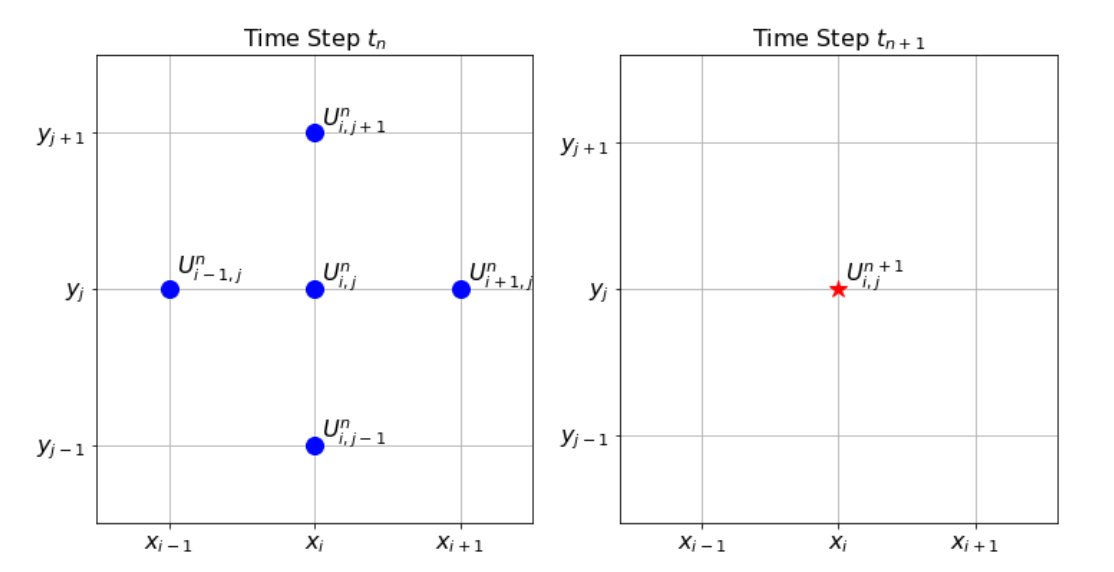

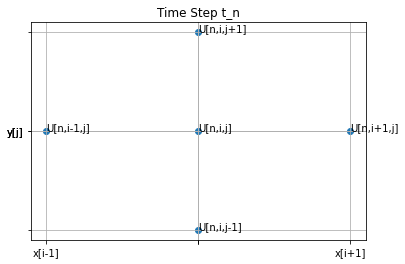

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

x = [1, 2, 2, 2, 3]
y = [2, 3, 2, 1, 2]
p_labels = ["U[n,i-1,j]","U[n,i,j+1]", "U[n,i,j]", "U[n,i,j-1]", "U[n,i+1,j]"]

fig = plt.figure()
ax = fig.gca()
plt.scatter(x, y)

for i, txt in enumerate(p_labels):
    ax.annotate(txt, (x[i], y[i]))

ax_labels = ['x[i-1]','' ,'x[i]','', 'x[i+1]']
ay_labels = ['y[j-1]','','y[j+1]','', 'y[j]']
plt.xticks(x, ax_labels, rotation='horizontal')
plt.yticks(y, ay_labels, rotation='horizontal')

plt.title("Time Step t_n")    
plt.grid()
plt.show()

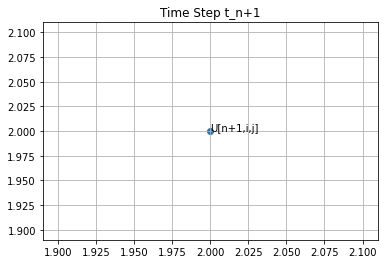

In [62]:
x = [2]
y = [2]
p_labels = ["U[n+1,i,j]"]

fig = plt.figure()
ax = fig.gca()
plt.scatter(x, y)

for i, txt in enumerate(p_labels):
    ax.annotate(txt, (x[i], y[i]))
    
plt.title("Time Step t_n+1")    
plt.grid()
plt.show()

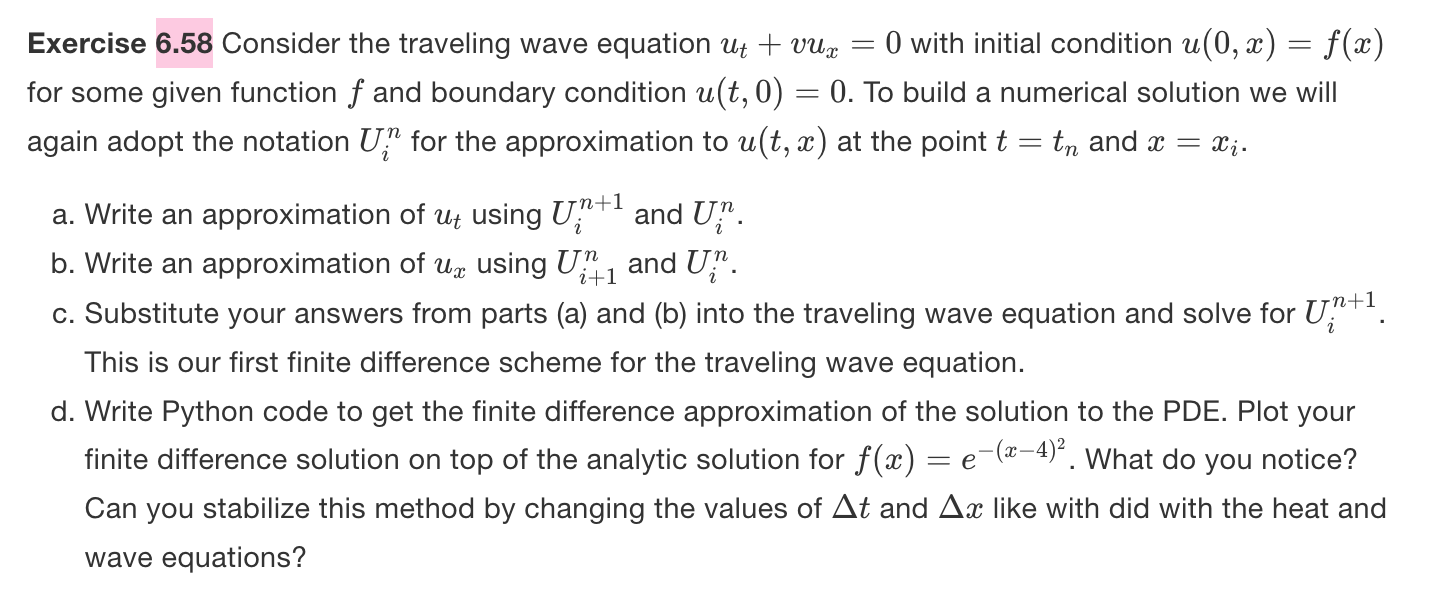

## a
$u_{t}$ = $\frac{u_{i}^{n+1} - u_{i}^{n}}{∆t}$

## b
$u_{x}$ = $\frac{u_{i+1}^{n} - u_{i}^{n}}{∆x}$

## c
0 = $\frac{u_{i}^{n+1} - u_{i}^{n}}{∆t}$ + v$\frac{u_{i+1}^{n} - u_{i}^{n}}{∆x}$ </br>
$u_{i}^{n+1}$ = $u_{i}^{n} - \frac{v∆t}{∆x} (u_{i+1}^{n} - u_{i}^{n})$ </br>
since v = $\frac{∆x}{∆t}$ --> $u_{i}^{n+1}$ = $2u_{i}^{n} - u_{i+1}^{n}$

## d

dt =  0.1 , dx =  0.1


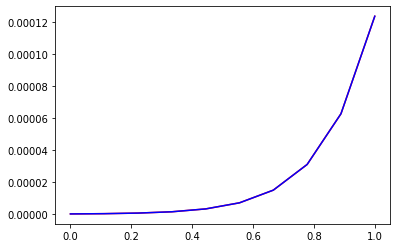

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# create an array for t starting at t = 0 and ending at t = 1
# divide this interval into 10 equal parts
t = np.linspace(0, 1, 10)
dt = 0.1

# create an array for x starting at x = 0 and ending at x = 1
# divide this interval into 10 equal parts
x = np.linspace(0, 1, 10)
dx = 0.1

# print the values
print ("dt = ", dt, ", dx = ", dx)

# build array U to store all approximations at all times and 
# at all spatial points
u = np.zeros ((len(t), len(x)))

# enforce the left boundary condition
u[:, 0] = 0

# enforce the right boundary condition
u[:, -1] = 0

# enforce the initial condition 
## when t = 0
u[0,:] = np.exp(-(x-4)**2)

# fill the array U one row at a time, leave the boundary conditions
# fixed and fill indices 1 through -2
for n in range (len(t) - 1):
    #u[n+1,1:-1] = u[n,1:-1] - a*(u[n, 2:] - u[n,1:-1]) 
    u[n+1,1:-1] = 2*u[n,1:-1] - u[n, 2:]

y = np.exp(-(x-4)**2)

# plot the solution
plt.plot(x, u[0], color = "red", label = "u solution" )
plt.plot(x, y, color = "blue", label = "analytical solution")

solution where v does not cancel out and an arbirary v value is used --> same result 

dt =  0.1 , dx =  0.1


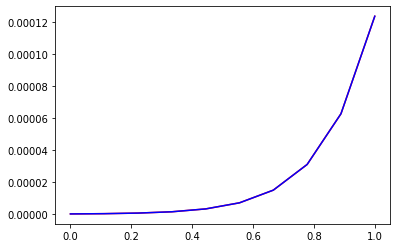

In [64]:
import numpy as np
import matplotlib.pyplot as plt


# create an array for t starting at t = 0 and ending at t = 1
# divide this interval into 10 equal parts
t = np.linspace(0, 1, 10)
dt = 0.1

# create an array for x starting at x = 0 and ending at x = 1
# divide this interval into 10 equal parts
x = np.linspace(0, 1, 10)
dx = 0.1

# set arbitrary velocity value 
v = 1

# print the values
print ("dt = ", dt, ", dx = ", dx)

# build array U to store all approximations at all times and 
# at all spatial points
u = np.zeros ((len(t), len(x)))

# enforce the left boundary condition
u[:, 0] = 0

# enforce the right boundary condition
u[:, -1] = 0

# enforce the initial condition 
## when t = 0
u[0,:] = np.exp(-(x-4)**2)

# fill the array U one row at a time, leave the boundary conditions
# fixed and fill indices 1 through -2
for n in range (len(t) - 1):
    #u[n+1,1:-1] = u[n,1:-1] - a*(u[n, 2:] - u[n,1:-1]) 
    u[n+1,1:-1] = u[n,1:-1] - (v*dt/dx) * (u[n, 2:]- u[n, 1:-1])

y = np.exp(-(x-4)**2)

# plot the solution
plt.plot(x, u[0], color = "red", label = "u solution" )
plt.plot(x, y, color = "blue", label = "analytical solution")

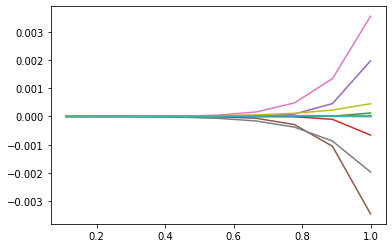

In [65]:
plt.plot(x[1:], u[1:], label = "alt. u solutions")

The first solution from the finite difference solution yields the same output as the analytical solution. The graphs are nearly identical. For the remaining outputs from the finite difference solution, the graph show varying exponential plots. Unlike the heat and wave functions, this method cannot be stabilized by changing ∆x and ∆t because these values are essentially cancelled out by v. We can see this since $v = \frac{∆x}{∆t}$ such that $\frac{v∆t}{∆x}$ = 1. 

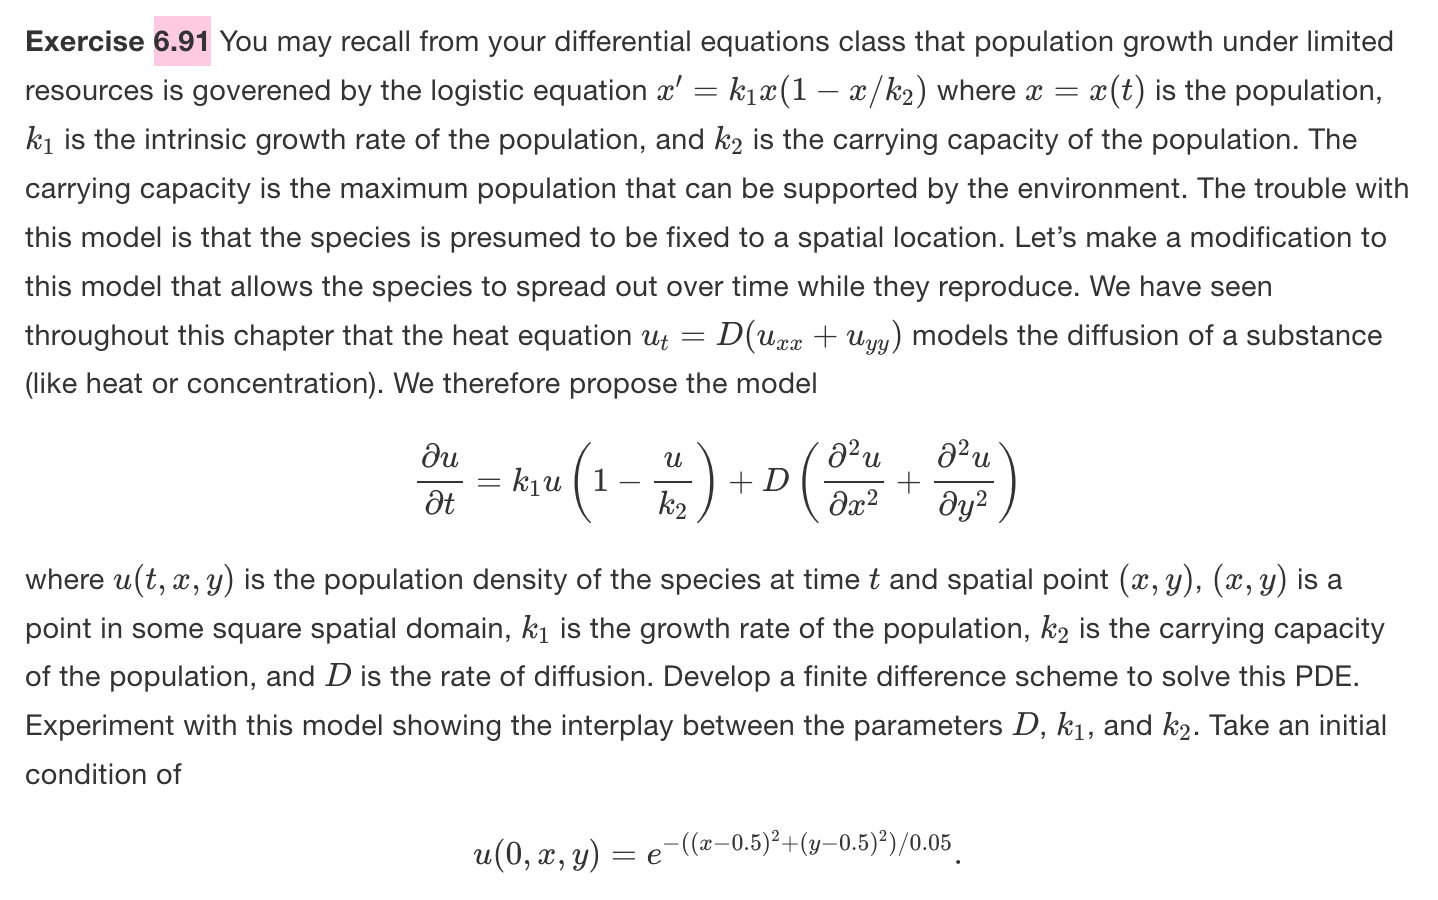

$\frac{u_{i, j}^{n+1} - u_{i, j}^{n}}{∆t}$ = $k_{1} u_{i, j}^{n}(1 - \frac{u_{i, j}^{n}}{k_{2}}$) + D($\frac{u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n}}{∆x^2} + \frac{u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n}}{∆y^{2}})$ </br>
$u_{i, j}^{n+1}$ = $(k_{1} u_{i, j}^{n}(1 - \frac{u_{i, j}^{n}}{k_{2}}$) + D($\frac{u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n}}{∆x^2} + \frac{u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n}}{∆y^{2}}))∆t + u_{i, j}^{n}$

In [66]:
def wrapper (x, y, u, t, X, Y):
    def plotter(Frame):
        fig = plt.figure(figsize=(12,10))
        ax = fig.gca(projection='3d')
        ax.plot_surface(X,Y,u[Frame,:,:], cmap=cm.coolwarm)
        ax.set_zlim(0,1)
        plt.show()
    interactive_plot = interactive(plotter, Frame=(0,len(t)))
    display (interactive_plot)

def main():
    # create an array for t starting at t = 0 and ending at t = 1
    # divide this interval into 10 equal parts
    t = np.linspace(0,1,10)
    dt = 1e-3

    # create an array for x and y starting at x = 0 and ending at x = 1
    # divide this interval into 10 equal parts
    x = np.linspace(0,1,10)
    y = np.linspace(0,1,10)
    
    dx = 0.1
    dy = 0.1
    
    X, Y = np.meshgrid(x,y)
    
    # define the wave velocity
    D = 1
    
    k1 = 5
    k2 = 10

    # print the values
    print ("dt = ", dt, ", dx = ", dx)

    # build array U to store all approximations at all times and 
    # at all spatial points
    u = np.zeros ((len(t), len(x), len(y)))

    # enforce the left boundary condition
    u[:,:, 0] = 0 # y initial 
    u[:,0, :] = 0 # x initial 

    # enforce the right boundary condition
    u[:, :, -1] = 0 # y initial 
    u[:, -1, :] = 0 # x initial 
    

    # enforce the initial condition
    u[0,:, :] = np.exp(-((x-0.5)**2 + (y-0.5)**2)/0.05)

    # fill the array U one row at a time, leave the boundary conditions
    # fixed and fill indices 1 through -2
    for n in range (len(t) - 1):
            u[n + 1, 1:-1, 1:-1] = (k1*u[n, 1:-1, 1:-1]*(1-(u[n, 1:-1, 1:-1]/k2)) + \
            D*((u[n, 2:, 1:-1] - 2*u[n, 1:-1, 1:-1] + u[n, :-2, 1:-1]) / dx**2) + \
            ((u[n, 1:-1, 2:] - 2*u[n, 1:-1, 1:-1] + u[n, 1:-1, :-2])/dy**2))*dt + \
            u[n, 1:-1, 1:-1] 
    # plot the solution
    wrapper (x, y, u, t, X, Y)
    
main()

dt =  0.001 , dx =  0.1


interactive(children=(IntSlider(value=5, description='Frame', max=10), Output()), _dom_classes=('widget-intera…

In [67]:
def wrapper (x, y, u, t, X, Y):
    def plotter(Frame):
        fig = plt.figure(figsize=(12,10))
        ax = fig.gca(projection='3d')
        ax.plot_surface(X,Y,u[Frame,:,:], cmap=cm.coolwarm)
        ax.set_zlim(0,1)
        plt.show()
    interactive_plot = interactive(plotter, Frame=(0,len(t)))
    display (interactive_plot)

def main():
    # create an array for t starting at t = 0 and ending at t = 1
    # divide this interval into 10 equal parts
    t = np.linspace(0,1,10)
    dt = 1e-3

    # create an array for x and y starting at x = 0 and ending at x = 1
    # divide this interval into 10 equal parts
    x = np.linspace(0,1,10)
    y = np.linspace(0,1,10)
    
    dx = 0.1
    dy = 0.1
    
    X, Y = np.meshgrid(x,y)
    
    # define the wave velocity
    D = 2
    
    k1 = 4
    k2 = 8

    # print the values
    print ("dt = ", dt, ", dx = ", dx)

    # build array U to store all approximations at all times and 
    # at all spatial points
    u = np.zeros ((len(t), len(x), len(y)))

    # enforce the left boundary condition
    u[:,:, 0] = 0 # y initial 
    u[:,0, :] = 0 # x initial 

    # enforce the right boundary condition
    u[:, :, -1] = 0 # y initial 
    u[:, -1, :] = 0 # x initial 
    

    # enforce the initial condition
    u[0,:, :] = np.exp(-((x-0.5)**2 + (y-0.5)**2)/0.05)

    # fill the array U one row at a time, leave the boundary conditions
    # fixed and fill indices 1 through -2
    for n in range (len(t) - 1):
            u[n + 1, 1:-1, 1:-1] = (k1*u[n, 1:-1, 1:-1]*(1-(u[n, 1:-1, 1:-1]/k2)) + \
            D*((u[n, 2:, 1:-1] - 2*u[n, 1:-1, 1:-1] + u[n, :-2, 1:-1]) / dx**2) + \
            ((u[n, 1:-1, 2:] - 2*u[n, 1:-1, 1:-1] + u[n, 1:-1, :-2])/dy**2))*dt + \
            u[n, 1:-1, 1:-1] 
    # plot the solution
    wrapper (x, y, u, t, X, Y)
    
main()

dt =  0.001 , dx =  0.1


interactive(children=(IntSlider(value=5, description='Frame', max=10), Output()), _dom_classes=('widget-intera…

In [68]:
def wrapper (x, y, u, t, X, Y):
    def plotter(Frame):
        fig = plt.figure(figsize=(12,10))
        ax = fig.gca(projection='3d')
        ax.plot_surface(X,Y,u[Frame,:,:], cmap=cm.coolwarm)
        ax.set_zlim(0,1)
        plt.show()
    interactive_plot = interactive(plotter, Frame=(0,len(t)))
    display (interactive_plot)

def main():
    # create an array for t starting at t = 0 and ending at t = 1
    # divide this interval into 10 equal parts
    t = np.linspace(0,1,10)
    dt = 1e-3

    # create an array for x and y starting at x = 0 and ending at x = 1
    # divide this interval into 10 equal parts
    x = np.linspace(0,1,10)
    y = np.linspace(0,1,10)
    
    dx = 0.1
    dy = 0.1
    
    X, Y = np.meshgrid(x,y)
    
    # define the wave velocity
    D = 3
    
    k1 = 15
    k2 = 30

    # print the values
    print ("dt = ", dt, ", dx = ", dx)

    # build array U to store all approximations at all times and 
    # at all spatial points
    u = np.zeros ((len(t), len(x), len(y)))

    # enforce the left boundary condition
    u[:,:, 0] = 0 # y initial 
    u[:,0, :] = 0 # x initial 

    # enforce the right boundary condition
    u[:, :, -1] = 0 # y initial 
    u[:, -1, :] = 0 # x initial 
    

    # enforce the initial condition
    u[0,:, :] = np.exp(-((x-0.5)**2 + (y-0.5)**2)/0.05)

    # fill the array U one row at a time, leave the boundary conditions
    # fixed and fill indices 1 through -2
    for n in range (len(t) - 1):
            u[n + 1, 1:-1, 1:-1] = (k1*u[n, 1:-1, 1:-1]*(1-(u[n, 1:-1, 1:-1]/k2)) + \
            D*((u[n, 2:, 1:-1] - 2*u[n, 1:-1, 1:-1] + u[n, :-2, 1:-1]) / dx**2) + \
            ((u[n, 1:-1, 2:] - 2*u[n, 1:-1, 1:-1] + u[n, 1:-1, :-2])/dy**2))*dt + \
            u[n, 1:-1, 1:-1] 
    # plot the solution
    wrapper (x, y, u, t, X, Y)
    
main()

dt =  0.001 , dx =  0.1


interactive(children=(IntSlider(value=5, description='Frame', max=10), Output()), _dom_classes=('widget-intera…

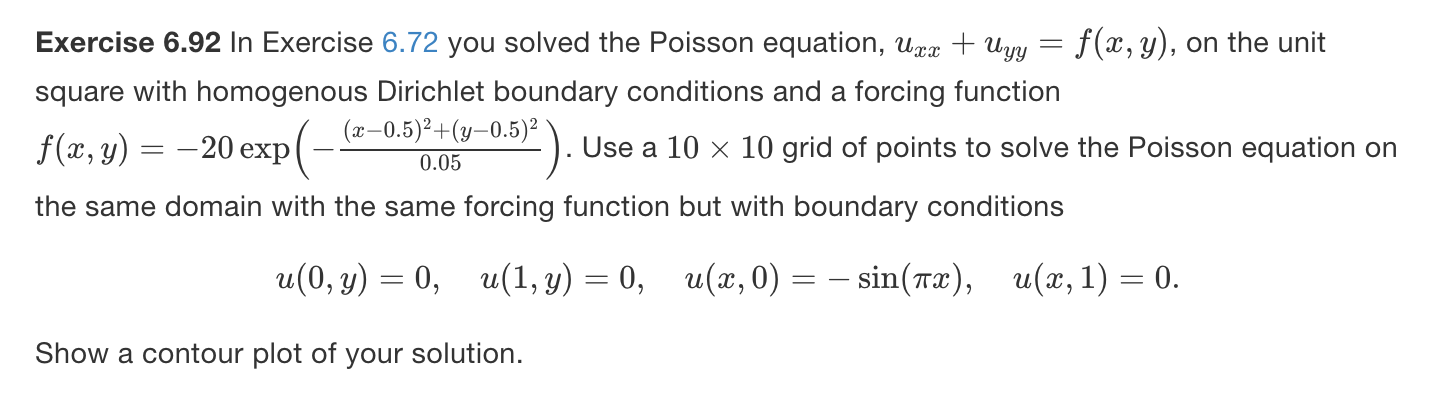

In [69]:
# number of square on a side
M = 10

# tolerance 
tol = 1e-3

# establish arrays 
phi = np.zeros([M+1, M+1], float)
phi_prime = np.empty([M+1, M+1], float)

# initialize boundaries 
phi[0, :] = 0
phi[1, :] = 0
phi[:, 1] = 0 

h = 0.1 #domain/M
delta = 1.0

# initial array to store function 
f = np.zeros([M+1, M+1], float)

# function loop 
for i in range(M+1):
    for j in range(M+1):
        f[i, j] = -20 * np.exp(-((h * i - 0.5)**2 + (h * j - 0.5)**2)/0.05)
        
# main loop 
while(delta > tol):
    for i in range(M+1):
        for j in range(M+1):
            if (i == 0) or (i == M):
                phi_prime[i, j] = 0
            elif(j == 0):
                phi_prime[i, j] = -np.sin(np.pi * i * h)
            elif (j == M):
                phi_prime[i, j] = 0
            else:
                phi_prime[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]) - (h**2 * f[i, j]) / 4
    
    diff = abs(phi-phi_prime)
    delta = np.amax(diff)

    phi, phi_prime = phi_prime, phi

Text(0.5, 1.0, 'Contour Plot')

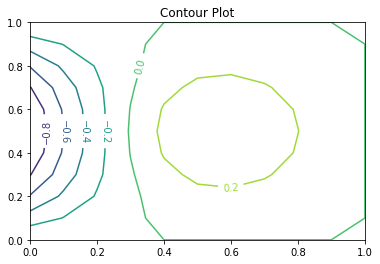

In [70]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

x = np.arange(0, 1.1, 0.1)
y = np.arange(0, 1.1, 0.1)
X, Y = np.meshgrid(x, y)
Z = phi

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Contour Plot')